In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('1.txt', names=['x', 'y'])

mean_x = df['x'].mean()
mean_y = df['y'].mean()
s_x = df['x'].std()
s_y = df['y'].std()

Коэффициент Пирсона: -0.9834125853105857
a: -2.731676318648403, b: -0.15282395099937673


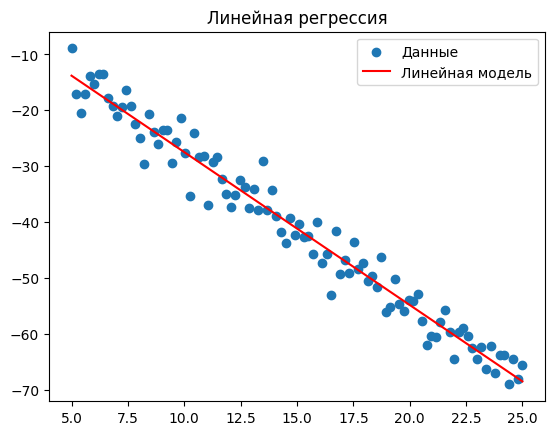


Проверка адекватности модели:
Общая дисперсия: 265.0432, Остаточная дисперсия: 8.8088
F-статистика: 30.0884, F-критическое: 1.3950
Модель адекватна.


In [ ]:
r = df.corr()['x']['y']
print(f"Коэффициент Пирсона: {r}")

a = r * (s_y / s_x)
b = mean_y - a * mean_x
print(f"a: {a}, b: {b}")


x_lin = np.linspace(df['x'].min(), df['x'].max(), 100)
y_lin = a*x_lin + b

plt.scatter(df['x'], df['y'], label='Данные')
plt.plot(x_lin, y_lin, color = 'red', label='Линейная модель')
plt.legend()
plt.title('Линейная регрессия')
plt.show()

# Расчет F-статистики и проверка адекватности модели
n = df.shape[0]  # Количество наблюдений
alpha = 0.05  # Уровень значимости
mean_y = df['y'].mean()

# Общая дисперсия (S_obsh_2)
df['(y - y_mean)^2'] = (df['y'] - mean_y) ** 2
S_obsh_2 = df['(y - y_mean)^2'].sum() / (n - 1)

# Остаточная дисперсия (S_mod_2)
df['(y - y_lin(x))^2'] = (df['y'] - (a * df['x'] + b)) ** 2
S_mod_2 = df['(y - y_lin(x))^2'].sum() / (n - 2)  # 2 - это количество параметров модели (a и b)

# F-статистика
S_min_2, S_max_2 = min(S_obsh_2, S_mod_2), max(S_obsh_2, S_mod_2)
F = S_max_2 / S_min_2

# Критическое значение F для проверки адекватности модели
F_crit = stats.f.ppf(1 - alpha, n - 2, n - 1)

# Вывод результатов
print(f"\nПроверка адекватности модели:")
print(f"Общая дисперсия: {S_obsh_2:.4f}, Остаточная дисперсия: {S_mod_2:.4f}")
print(f"F-статистика: {F:.4f}, F-критическое: {F_crit:.4f}")
print("Модель адекватна." if F > F_crit else "Модель не адекватна.")


In [ ]:
y_pred = a*df['x'] + b
SST = ((df['y'] - mean_y) ** 2).sum()
SSR = ((y_pred - mean_y) ** 2).sum()
R2 = SSR / SST
print(f"Коэффициент детерминации: {R2}")

n = len(df)
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
t_crit = stats.t.ppf(1 - 0.05 / 2, n - 2)

print(f"Рассчитанная t-статистика: {t_stat:.4f}")
print(f"Критическое t-значение для уровня значимости 0.05: {t_crit:.4f}")

if abs(t_stat) > t_crit:
    print("Отклонение от нуля значимо")
else:
    print("Не отклоняется от нуля")

Коэффициент детерминации: 0.9671003129472499
Рассчитанная t-статистика: -53.6726
Критическое t-значение для уровня значимости 0.05: 1.9845
Отклонение от нуля значимо


Доверительный интервал для a: [-2.8321698018365082, -2.6311828354602977]
Доверительный интервал для b: [-1.7712066370279504, 1.465558735029197]
Прогнозируемый y: -76.63976087315466, Доерительный интервал: [-82.70142071508283, -70.57810103122648]


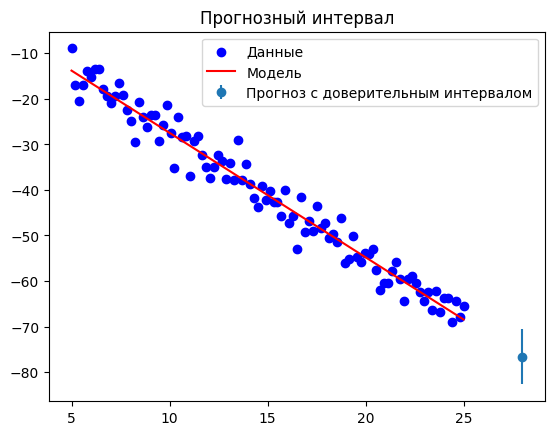

In [ ]:
S_resid = np.sqrt(((df['y'] - y_pred) ** 2).sum() / (n - 2))
m_a = S_resid / (s_x * np.sqrt(n))
m_b = S_resid * np.sqrt(1 / n + (mean_x ** 2) / (s_x ** 2 * n))
a_low, a_high = a - t_crit * m_a, a + t_crit * m_a
b_low, b_high = b - t_crit * m_b, b + t_crit * m_b
print(f"Доверительный интервал для a: [{a_low}, {a_high}]")
print(f"Доверительный интервал для b: [{b_low}, {b_high}]")

x_new = 28
y_new = a*x_new + b
E = t_crit * S_resid * np.sqrt(1 + 1 / n + (x_new - mean_x) ** 2 / (s_x ** 2 * n))
y_new_lower, y_new_upper = y_new - E, y_new + E
print(f"Прогнозируемый y: {y_new}, Доерительный интервал: [{y_new_lower}, {y_new_upper}]")

plt.scatter(df['x'], df['y'], color='blue', label='Данные')
plt.plot(x_lin, y_lin, color='red', label='Модель')
plt.errorbar(x_new, y_new, yerr=[[y_new - y_new_lower], [y_new_upper - y_new]], fmt='o', label='Прогноз с доверительным интервалом')
plt.legend()
plt.title('Прогнозный интервал')
plt.show()

In [ ]:
data = pd.read_csv('2.txt', names=['x', 'd1', 'd2', 'y'])
num_samples = data.shape[0]

def calculate_slope_and_intercept(df):
    std_x = df['x'].std()
    std_y = df['y'].std()
    mean_x = df['x'].mean()
    mean_y = df['y'].mean()
    correlation = df['x'].corr(df['y'])
    slope = correlation * std_y / std_x
    intercept = mean_y - slope * mean_x
    return slope, intercept

subset_d1_0 = data[data['d1'] == 0]
subset_d1_1 = data[data['d1'] == 1]
subset_d2_0 = data[data['d2'] == 0]
subset_d2_1 = data[data['d2'] == 1]

slope_full, intercept_full = calculate_slope_and_intercept(data)
slope_1, intercept_1 = calculate_slope_and_intercept(subset_d1_0)
slope_2, intercept_2 = calculate_slope_and_intercept(subset_d1_1)
slope_3, intercept_3 = calculate_slope_and_intercept(subset_d2_0)
slope_4, intercept_4 = calculate_slope_and_intercept(subset_d2_1)

In [ ]:
data['squared_residuals'] = (data['y'] - (data['x'] * slope_full + intercept_full)) ** 2
total_RSS = data['squared_residuals'].sum()

num_parameters = 2

subset_d1_0['squared_residuals'] = (subset_d1_0['y'] - (subset_d1_0['x'] * slope_1 + intercept_1)) ** 2
RSS_d1_0 = subset_d1_0['squared_residuals'].sum()

subset_d1_1['squared_residuals'] = (subset_d1_1['y'] - (subset_d1_1['x'] * slope_2 + intercept_2)) ** 2
RSS_d1_1 = subset_d1_1['squared_residuals'].sum()

F_stat_d1 = ((total_RSS - RSS_d1_0 - RSS_d1_1) / num_parameters) / ((RSS_d1_0 + RSS_d1_1) / (num_samples - 2 * num_parameters))

alpha = 0.05
F_critical_d1 = stats.f.ppf(1 - alpha, num_parameters, num_samples - 2 * num_parameters)

subset_d2_0['squared_residuals'] = (subset_d2_0['y'] - (subset_d2_0['x'] * slope_3 + intercept_3)) ** 2
RSS_d2_0 = subset_d2_0['squared_residuals'].sum()

subset_d2_1['squared_residuals'] = (subset_d2_1['y'] - (subset_d2_1['x'] * slope_4 + intercept_4)) ** 2
RSS_d2_1 = subset_d2_1['squared_residuals'].sum()

F_stat_d2 = ((total_RSS - RSS_d2_0 - RSS_d2_1) / num_parameters) / ((RSS_d2_0 + RSS_d2_1) / (num_samples - 2 * num_parameters))

print(f"F-статистика для d1: {F_stat_d1}, критическое: {F_critical_d1}")
if F_stat_d1 > F_critical_d1:
    print("Деление по d1 оправдано.")
else:
    print("Деление по d1 не оправдано.")

print(f"F-статистика для d2: {F_stat_d2}, критическое: {F_critical_d1}")
if F_stat_d2 > F_critical_d1:
    print("Деление по d2 оправдано.")
else:
    print("Деление по d2 не оправдано.")

F-статистика для d1: 169.71006673470131, критическое: 3.0419902345156493
Деление по d1 оправдано.
F-статистика для d2: 0.44159090855085004, критическое: 3.0419902345156493
Деление по d2 не оправдано.


<ipython-input-26-76105122474f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_d1_0['squared_residuals'] = (subset_d1_0['y'] - (subset_d1_0['x'] * slope_1 + intercept_1)) ** 2
<ipython-input-26-76105122474f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_d1_1['squared_residuals'] = (subset_d1_1['y'] - (subset_d1_1['x'] * slope_2 + intercept_2)) ** 2
<ipython-input-26-76105122474f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

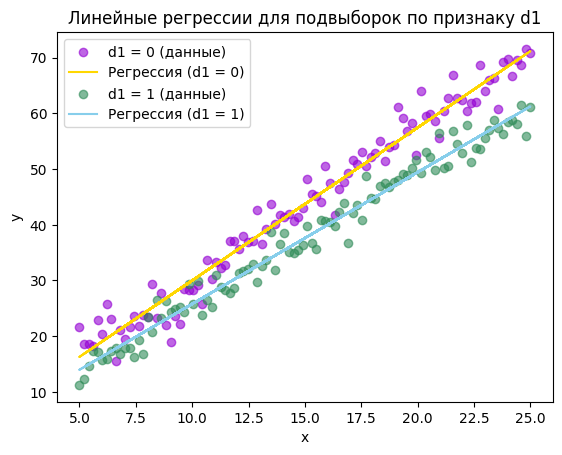

In [ ]:
plt.figure()

plt.scatter(subset_d1_0['x'], subset_d1_0['y'], label='d1 = 0 (данные)', alpha=0.6, color='darkviolet')
x_range_0 = subset_d1_0['x']
plt.plot(x_range_0, slope_1 * x_range_0 + intercept_1, color='gold', label='Регрессия (d1 = 0)')

plt.scatter(subset_d1_1['x'], subset_d1_1['y'], label='d1 = 1 (данные)', alpha=0.6, color='seagreen')
x_range_1 = subset_d1_1['x']
plt.plot(x_range_1, slope_2 * x_range_1 + intercept_2, color='skyblue', label='Регрессия (d1 = 1)')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Линейные регрессии для подвыборок по признаку d1')
plt.show()


In [ ]:
df_3 = pd.read_csv('3.txt', names=['x', 'y'])

In [ ]:
def solve_slope_intercept(df):
    s_x = df['x'].std()
    s_y = df['y'].std()
    mean_x = df['x'].mean()
    mean_y = df['y'].mean()
    r = df['x'].corr(df['y'])
    a = r * s_y / s_x
    b = mean_y - a * mean_x
    return a, b

slope_1, intercept_1 = solve_slope_intercept(df_3)
print(f"Уравнение регрессии: ŷ(x) = {slope_1:.3f} * x + {intercept_1:.3f}")

Уравнение регрессии: ŷ(x) = -4.142 * x + 28.497


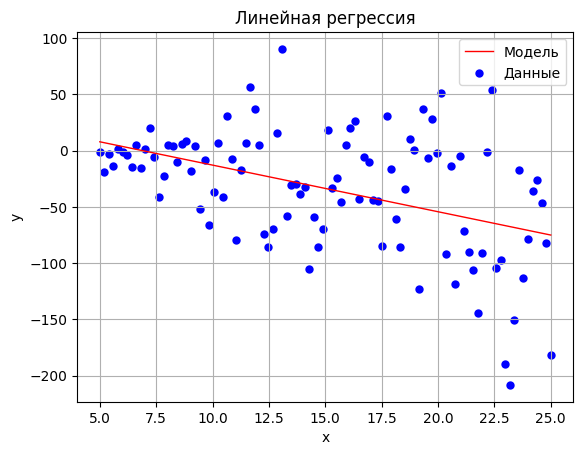

In [ ]:
x_lin_func_3_1 = np.linspace(df_3['x'].min(), df_3['x'].max(), 100)
y_lin_func_3_1 = slope_1 * x_lin_func_3_1 + intercept_1

plt.plot(x_lin_func_3_1, y_lin_func_3_1, lw=1, color='r', label='Модель')
plt.scatter(df_3['x'], df_3['y'], lw=0.01, color='b', label='Данные')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Линейная регрессия')
plt.show()

In [ ]:
n = df_3.shape[0]
alpha = 0.05
mean_y = df_3['y'].mean()

df_3['(y - y_mean)^2'] = (df_3['y'] - mean_y) ** 2
S_obsh_2 = (df_3['(y - y_mean)^2'].sum()) / (n - 1)

d = 2
df_3['(y - y_lin(x))^2'] = (df_3['y'] - (df_3['x'] * slope_1 + intercept_1)) ** 2
S_mod_2 = (df_3['(y - y_lin(x))^2'].sum()) / (n - d)

S_min_2, S_max_2 = min(S_obsh_2, S_mod_2), max(S_obsh_2, S_mod_2)
F = S_max_2 / S_min_2
F_crit = stats.f.ppf(1 - alpha, n - d, n - 1)
print(f"\nПроверка адекватности модели:")
print(f"Общая дисперсия: {S_obsh_2:.4f}, Остаточная дисперсия: {S_mod_2:.4f}")
print(f"F-статистика: {F:.4f}, F-критическое: {F_crit:.4f}")
print("Модель адекватна." if F > F_crit else "Модель не адекватна.")
df_3['x^2'] = df_3['x'] ** 2
m_a = np.sqrt(S_mod_2) / (df_3['x'].std() * np.sqrt(n))
m_b = (np.sqrt(S_mod_2) * np.sqrt(df_3['x^2'].sum())) / (df_3['x'].std() * n)

t_a = slope_1 / m_a
t_b = intercept_1 / m_b
t_crit = stats.t.ppf(1 - alpha / 2, n - d)

print(f"\nПроверка значимости коэффициентов:")
print(f"Наклон a: {slope_1:.4f}, T-статистика: {t_a:.4f}, T-критическое: {t_crit:.4f}")
print(f"Свободный член b: {intercept_1:.4f}, T-статистика: {t_b:.4f}, T-критическое: {t_crit:.4f}")
print("Наклон значим." if abs(t_a) > t_crit else "Наклон НЕ значим.")
print("Свободный член значим." if abs(t_b) > t_crit else "Свободный член НЕ значим.")


Проверка адекватности модели:
Общая дисперсия: 2937.2266, Остаточная дисперсия: 2371.9985
F-статистика: 1.2383, F-критическое: 1.3950
Модель не адекватна.

Проверка значимости коэффициентов:
Наклон a: -4.1415, T-статистика: -4.9839, T-критическое: 1.9845
Свободный член b: 28.4970, T-статистика: 2.1308, T-критическое: 1.9845
Наклон значим.
Свободный член значим.


In [ ]:
df_3['e'] = abs(df_3['y'] - (df_3['x'] * slope_1 + intercept_1))
df_3['rang_x'] = df_3['x'].rank()
df_3['rang_e'] = df_3['e'].rank()
df_3['(rang_x - rang_e)^2'] = (df_3['rang_e'] - df_3['rang_x']) ** 2
r_s = 1 - (6 * df_3['(rang_x - rang_e)^2'].sum()) / (n * (n ** 2 - 1))
t_s = r_s * np.sqrt(n - 2) / np.sqrt(1 - r_s ** 2)

print(f"\nТест Спирмена:")
print(f"Коэффициент Спирмена: {r_s:.4f}, T-статистика: {t_s:.4f}, T-критическое: {t_crit:.4f}")
print("Гетероскедастичность присутствует." if t_s > t_crit else "Гетероскедастичность отсутствует.")


Тест Спирмена:
Коэффициент Спирмена: 0.4721, T-статистика: 5.3009, T-критическое: 1.9845
Гетероскедастичность присутствует.


In [ ]:
m_1 = int(4 * n / 10)
m_2 = int(4 * n / 10)
F_gq = (df_3['(y - y_lin(x))^2'].iloc[0:m_1].sum() / (m_1 - 1)) / (df_3['(y - y_lin(x))^2'].iloc[-m_2:].sum() / (m_2 - 1))
F_crit_2 = stats.f.ppf(1 - alpha, m_1 - 1, m_2 - 1)

print(f"\nТест Гольдфельда-Квандта:")
print(f"F-статистика: {F_gq:.4f}, F-критическое значение: {F_crit_2:.4f}")
print("Гетероскедастичность присутствует." if F_gq > F_crit_2 else "Гетероскедастичность отсутствует.")


Тест Гольдфельда-Квандта:
F-статистика: 0.2462, F-критическое значение: 1.7045
Гетероскедастичность отсутствует.
